In [4]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

In [4]:
movies = pd.read_csv('../data/movies_metadata.csv')
ratings = pd.read_csv('../data/ratings.csv')

# Drop unnecessary columns
movies.drop(['adult', 'belongs_to_collection', 'homepage', 'poster_path', 'production_companies', 'spoken_languages', 'tagline', 'original_title', 'video', 'popularity'], axis=1, inplace=True)

/home/buscemi/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Clean Data
Remove and reorder columns.

In [5]:
# Re-order columns
movies = movies[['id','imdb_id','title','budget','genres','original_language','overview','production_countries','release_date','revenue','runtime','status','vote_average','vote_count']]

# Rename columns
movies.rename(columns={'original_language': 'language', 'production_countries': 'production_country'}, inplace=True)

# Update data types
movies = movies.convert_dtypes()

# Remove irregular ids
movies.drop(movies.id.loc[movies.id.str.contains('-')].index, inplace=True)

# Convert data types
movies = movies.astype({"id": 'int', "budget": 'int'})

movies.sort_values(by='id', inplace=True)

movies.set_index('id', inplace=True)

movies.head()

,imdb_id,title,budget,genres,language,overview,production_country,release_date,revenue,runtime,status,vote_average,vote_count
id,,,,,,,,,,,,,
2,tt0094675,Ariel,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,Taisto Kasurinen is a Finnish coal miner whose...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,0,69,Released,7.1,44
3,tt0092149,Shadows in Paradise,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",fi,"An episode in the life of Nikander, a garbage ...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1986-10-16,0,76,Released,7.1,35
5,tt0113101,Four Rooms,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,It's Ted the Bellhop's first night on the job....,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-09,4300000,98,Released,6.5,539
6,tt0107286,Judgment Night,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,"While racing to a boxing match, Frank, Mike, J...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1993-10-15,12136938,110,Released,6.4,79
11,tt0076759,Star Wars,11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,Princess Leia is captured and held hostage by ...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1977-05-25,775398007,121,Released,8.1,6778


In [6]:
movies.dtypes

imdb_id                string
title                  string
budget                  int64
genres                 string
language               string
overview               string
production_country     string
release_date           string
revenue                 Int64
runtime                 Int64
status                 string
vote_average          float64
vote_count              Int64
dtype: object

In [7]:
ratings.sort_values(by='movieId', inplace=True)

ratings.drop(columns=['timestamp', 'userId'], inplace=True)

ratings.set_index('movieId', inplace=True)

In [8]:
ratings.head()

,rating
movieId,
1,4.0
1,4.0
1,5.0
1,2.0
1,3.0


In [5]:
movie_ratings = pd.read_csv('../data/movie_ratings.csv')

In [6]:
movie_ratings.head()

,movieId,imdb_id,title,budget,genres,language,overview,production_country,release_date,revenue,runtime,status,vote_average,vote_count,rating
0,2,tt0094675,Ariel,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,Taisto Kasurinen is a Finnish coal miner whose...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,0,69.0,Released,7.1,44,5.0
1,2,tt0094675,Ariel,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,Taisto Kasurinen is a Finnish coal miner whose...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,0,69.0,Released,7.1,44,3.0
2,2,tt0094675,Ariel,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,Taisto Kasurinen is a Finnish coal miner whose...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,0,69.0,Released,7.1,44,4.0
3,2,tt0094675,Ariel,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,Taisto Kasurinen is a Finnish coal miner whose...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,0,69.0,Released,7.1,44,3.0
4,2,tt0094675,Ariel,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,Taisto Kasurinen is a Finnish coal miner whose...,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1988-10-21,0,69.0,Released,7.1,44,3.5


In [7]:
# Update data types
movie_ratings = movie_ratings.convert_dtypes()
movie_ratings.dtypes

movieId                 Int64
imdb_id                string
title                  string
budget                  Int64
genres                 string
language               string
overview               string
production_country     string
release_date           string
revenue                 Int64
runtime                 Int64
status                 string
vote_average          float64
vote_count              Int64
rating                float64
dtype: object

### Group Ratings by Title
Show average rating for each movie

In [8]:
movie_ratings.drop(columns=['movieId', 'imdb_id', 'overview', 'production_country', 'release_date', 'status', 'genres', 'vote_count'], inplace=True)

In [9]:
movie_ratings.head()

,title,budget,language,revenue,runtime,vote_average,rating
0,Ariel,0,fi,0,69,7.1,5.0
1,Ariel,0,fi,0,69,7.1,3.0
2,Ariel,0,fi,0,69,7.1,4.0
3,Ariel,0,fi,0,69,7.1,3.0
4,Ariel,0,fi,0,69,7.1,3.5


In [18]:
title_avg = movie_ratings.groupby('title').rating.mean()
title_avg.sort_values().mean()

3.1285621874242486

In [21]:
country_scores = movie_ratings.groupby('language').rating.mean()

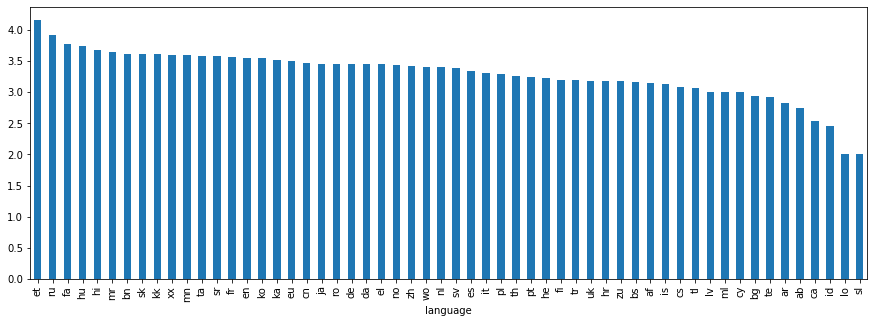

In [22]:
country_scores.sort_values(ascending=False).plot.bar(figsize=(15,5))